**Task 1**: You are required do a proper analysis of the whole data, plot all relevant plots, make note to all observations

**Task 2**: Let sample 100 transactions (denoted by S) from whole data (denoted by D), for every transaction in S, print 10 transactions from D which have least values of `similarity`

The similarity between any two vectors is defined as
$\text{similarity}(v_i,v_j) = \text{cos}^{-1} [ \frac{(v_i \cdot v_j)}{length(v_i) \times length(v_j)} ]$

1. $v_i$ represents a vector i.e. a row in your data.
2. $\text{similarity}(i,j)$ is just a function you can think it like $f(x,y)$
3. $\text{length}(v_i)$: length of the vector $v_i$
4. $i \cdot j$ is the dot product between the vectors $v_i$, $v_j$ 

**Task 3**: Apply 5 different ML algorithms to build classification models.





## Task 1 : Performing EDA(Exploratory Data Analysis on credit card data)

### About the data:

Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

**Feature 'Time'** contains the seconds elapsed between each transaction and the first transaction in the dataset. 

The **Feature 'Amount'** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 

**Feature 'Class'** is the response variable and it takes value 1 in case of fraud and 0 otherwise.



EDA is performed only on Time and Amount Feature.

#### Find and load the dataset from github

Lê Thanh Phương Nam ITITUN19008

In [1]:
#importing pandas module
import pandas as pd

In [2]:
credit_card_data = pd.read_csv("https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv")

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Print out dataframe information, shape, and count the values of `Class` to check if the data is imbalanced

In [4]:
credit_card_data.info

<bound method DataFrame.info of             Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]>

In [5]:
#finding the shape of dataframe (finding no.of observations and features in the given dataframe)
credit_card_data.shape

(284807, 31)

In [6]:
#finding whether it is balanced data or imbalanced data
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

From the above info it is clear that it is an imbalanced dataset

#### Let rename the class variables 

0 - legitimate

1- fraud

In [37]:
credit_card_data['Class'] = credit_card_data['Class'].apply(lambda x:'legitimate' if x == 0 else 'fraud')

In [8]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,legitimate
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,legitimate
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,legitimate
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,legitimate
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,legitimate


#### Subsetting the dataset, including only `Time`,`Amount`,`Class`

In [9]:
#subsetting the dataset (selecting only required columns which are useful for analysis)
credit_card_data_subset = credit_card_data[['Time','Amount','Class']]

#### Check the distribution of data (to check whether our subset of data contains same count as original dataset)

In [10]:
#checking the distribution of data (to check whether our subset of data contains same count as original dataset)
credit_card_data_subset['Class'].value_counts()

legitimate    284315
fraud            492
Name: Class, dtype: int64

#### Performing EDA on this data (Pair plots to find out which features have more importance when compared to other features)


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Histogram with PDF for feature 'time' ")

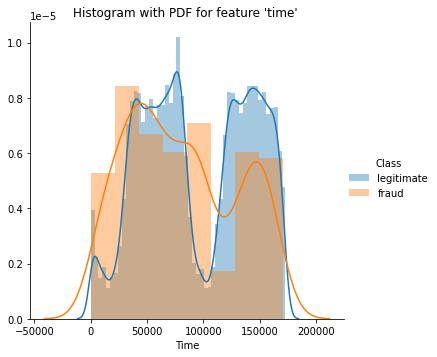

In [13]:
sns.FacetGrid(credit_card_data_subset,hue='Class',size = 5).map(sns.distplot,'Time').add_legend()
plt.title("Histogram with PDF for feature 'time' ")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Histogram with PDF for feature 'Amount' ")

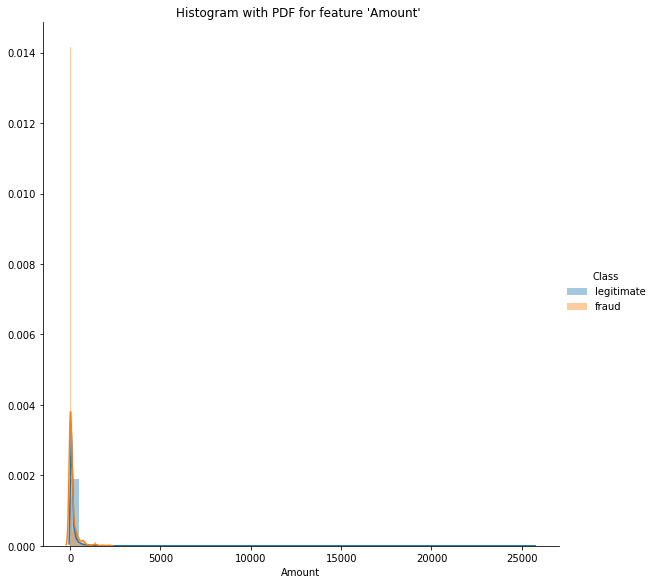

In [38]:
sns.FacetGrid(credit_card_data_subset,hue='Class',size=8).map(sns.distplot,'Amount').add_legend()
plt.title("Histogram with PDF for feature 'Amount' ")

**Observation:**

1.It is evident that the feature 'time' has so much of overlapping. We couldn't make any predictions or classifications out of it. So, we could discard this feature in classification of outcome.

2.Whereas the feature 'Amount' has also overlapping but we could make some prediction out of it when compared to another feature. 
    

    

#### Let divide the data according to classes for appropriate analysis

In [15]:
#dividing the data according to classes for appropriate analysis
credit_card_data_subset_class_fraud = credit_card_data_subset[credit_card_data_subset['Class'] == 'fraud']

In [16]:
credit_card_data_subset_class_fraud.shape

(492, 3)

In [17]:
credit_card_data_subset_class_fraud.head()

,Time,Amount,Class
541,406.0,0.00,fraud
623,472.0,529.00,fraud
4920,4462.0,239.93,fraud
6108,6986.0,59.00,fraud
6329,7519.0,1.00,fraud


In [18]:
credit_card_data_subset_class_legitimate = credit_card_data_subset[credit_card_data_subset['Class'] == 'legitimate']

In [19]:
credit_card_data_subset_class_legitimate.shape

(284315, 3)

In [20]:
credit_card_data_subset_class_legitimate.head()

,Time,Amount,Class
0,0.0,149.62,legitimate
1,0.0,2.69,legitimate
2,1.0,378.66,legitimate
3,1.0,123.50,legitimate
4,2.0,69.99,legitimate


### Univariate Analysis on feature 'Amount'

### Plotting **CDF(Cumulative Distributive Function)** and **PDF(Probability Density Function)** to analyze more about the data

In [21]:
import numpy as np

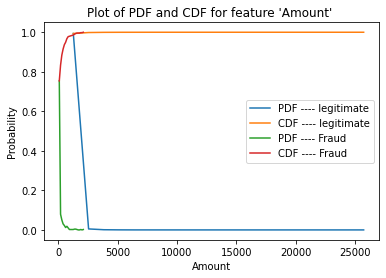

In [22]:
count,bin_edges = np.histogram(credit_card_data_subset_class_legitimate['Amount'],bins = 20,density = True)
PDF = count/sum(count)
#print("PDF : ",PDF)
#print("\nbin edges : " , bin_edges)
#computing CDF with help of PDF 
CDF = np.cumsum(PDF)
#plotting PDF,CDF
plt.plot(bin_edges[1:],PDF,label = "PDF ---- legitimate")
plt.plot(bin_edges[1:],CDF,label = "CDF ---- legitimate")

count,bin_edges = np.histogram(credit_card_data_subset_class_fraud['Amount'],bins = 20,density = True)
PDF = count/sum(count)
#computing CDF with help of PDF 
CDF = np.cumsum(PDF)
#plotting PDF,CDF
plt.plot(bin_edges[1:],PDF,label = "PDF ---- Fraud")
plt.plot(bin_edges[1:],CDF,label = "CDF ---- Fraud")

plt.xlabel("Amount")
plt.ylabel("Probability")
plt.title("Plot of PDF and CDF for feature 'Amount' ")
plt.legend()



**Observation and Conclusion **

1.From the above plot we can observe that there is slight overlap between CDF's of both classes

2.But , we can make an observation that more than **95% of fraud transactions** have **purchase Amount below 2500** approximately.

3.From that we can conclude that if the amount of purchase is below 2500 it is more likely to be a fraud transaction else can be classified as a legitimate 

### Box plot and whiskers

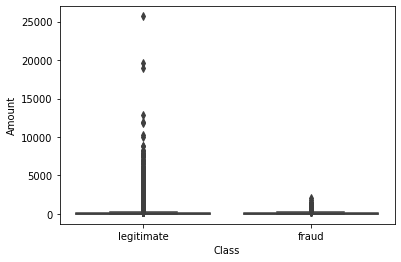

In [23]:
sns.boxplot(data = credit_card_data_subset,x='Class',y='Amount')

### Violin plot

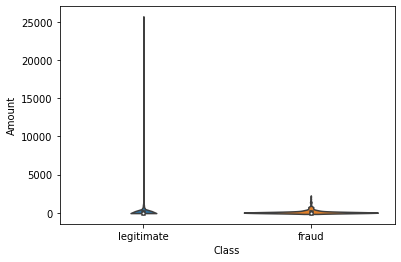

In [24]:
sns.violinplot(data= credit_card_data_subset,x='Class',y='Amount')

**Observation:**
    
These both plots(Box plots as well as Violin plots) are difficult to analyze when compared to PDF and CDF as the data is imbalanced,huge dataset and also scale is not so clear.

## Task 2 : Finding the least values of similarities 
Task 2: Sample (S) 100 transactions from whole data (D), for every transaction in S, print 10 transactions from D which have least values of 'similarity'



In [25]:
#creating a sample of 100 values from Data , 
#sample will not have 'Class' feature in it because for comparison we don't need 'Class' feature.
credit_card_data_sample = credit_card_data[credit_card_data.columns[:-1]].sample(100)

In [26]:
#indexes of all the samples (100 samples)
credit_card_data_sample.index

Int64Index([123571, 254941, 139442, 199517,  45038,  58508, 159277, 254083,
             23967, 147204, 210141,  42042, 239770,  46038, 274291,  30564,
             93068,  87391,  44951, 283043,  18877,  38463, 243203, 190758,
            273986, 250029,  78052, 151834, 212908,  88669,   7840, 213891,
             44442, 265440,  56593,  30716, 234789, 196175, 190177, 265503,
             54361,  87481, 100536, 168229, 187896, 192878, 267131, 112733,
            170151, 186402, 248482,  65780,  82224, 105189, 115202, 156050,
            246043,  25035, 263960,  22599,  47133, 206305,  59269,  57694,
            279764,  53933,  92036, 211164, 114571,  73227, 171639, 229389,
             54202, 130705, 157799, 269945,  66046,  80387, 155971,  49320,
            142462,  81266,  83622, 126724, 145955,  31579, 156562,  11115,
            266300,  87755,  60116,  25739,  62895,   5520,  94687,  45318,
            162746, 162233, 117665, 135203],
           dtype='int64')

In [27]:
credit_card_data_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
123571,76981.0,0.566334,-1.881824,-0.506725,-0.292965,-1.140761,-0.405476,0.199512,-0.212375,-1.018545,0.608109,0.591999,0.327256,-0.240840,0.380353,-0.617634,-1.427004,-0.020084,1.340087,-0.180460,0.357264,-0.167568,-0.895657,-0.426987,0.066987,0.277437,1.050979,-0.156113,0.057425,431.12
254941,156988.0,1.927585,-0.568117,-0.518389,0.117550,-0.560294,-0.179379,-0.637987,0.053049,0.834141,0.211380,0.485558,0.807787,0.247447,0.082993,0.206791,0.868284,-1.066631,0.707109,0.077729,-0.075769,0.221932,0.667807,0.086869,-0.435783,-0.329696,0.657461,-0.046814,-0.056572,45.50
139442,83158.0,1.256817,0.408161,0.321563,0.686329,-0.305714,-1.055741,0.137074,-0.245972,-0.079763,-0.304444,0.060478,0.629294,0.967188,-0.435022,1.012601,0.443701,-0.047564,-0.390200,-0.203484,-0.033258,-0.279067,-0.769177,0.120474,0.365666,0.241152,0.091918,-0.018227,0.032418,1.79
199517,133001.0,-0.003227,1.412486,0.769719,3.894248,1.922563,2.753763,0.603558,0.460625,-2.143806,1.906280,1.008317,0.124403,0.171107,0.359596,0.519491,-1.037357,0.594665,-1.141250,0.666059,0.308560,-0.141264,0.012490,0.127198,-0.775141,-1.143366,0.078432,0.353313,0.039648,5.76
45038,42181.0,-1.542045,-0.428519,1.933986,-0.709562,-0.398871,-0.648172,0.116459,0.141950,1.008929,-0.662764,-0.903066,0.579763,0.334273,-0.917169,-0.969136,0.117203,-0.212626,-0.627019,-0.302019,0.284509,-0.236481,-0.372544,0.192936,0.455488,0.128572,0.811491,0.295169,0.243501,117.00


In [28]:
#removing class for credit_card_data also.
credit_card_data_without_label = credit_card_data[credit_card_data.columns[:-1]]

In [29]:
credit_card_data_without_label.shape

(284807, 30)

#### Create a function called similarity to check for the similarity and return least 10 transactions:


In [30]:
def similarity(sample, whole_data): 
    """Returns a dataframe of top 10 least values of similarity
    sample -- pass the one of the index of sample and
    whole_data -- entire dataframe , as we have to compare each row in dataframe with sample."""
    index_value = []
    Class = []
    similarity_list = []
    for i in whole_data.index:
        similarity_value = np.arccos(np.dot(credit_card_data_sample.loc[sample],credit_card_data_without_label.loc[i])/(np.linalg.norm(credit_card_data_sample.loc[sample])*np.linalg.norm(credit_card_data_without_label.loc[i])))
        similarity_list.append(similarity_value)
        Class.append(credit_card_data['Class'][i])
        index_value.append(i)
    similarity_df = pd.DataFrame({'index_value':index_value,'similarity_value':similarity_list,'Class':Class})
    print(f"sample index value is {sample} ")
    return similarity_df.sort_values('similarity_value').head(10)
    
    
#sort_values -- will sort the dataframe based on the column given in the function of sort_values

#np.dot -- built-in function of numpy, to calculate dot product between two vectors

# .loc[] --- is used to return a row based on the value provided in the arguments (passing the index in that arguments)

#linalg.norm -- calculates the magnitude of the vector
#The length of the vector is referred to as the vector norm or the vector’s magnitude.
#The length of a vector is a nonnegative number that describes the extent of the vector in space, 
#and is sometimes referred to as the vector’s magnitude or the norm.
    

In [35]:

sample_index = int(input("Enter the one of the index value from your credit_card_data_sample : "))

Enter the one of the index value from your credit_card_data_sample : 45038


In [36]:
similarity(sample_index,credit_card_data_without_label)  
#credit_card_data_without_label -- is the whole dataframe without labels
#sample_index is the value (one of the index value) from the samples.

 

sample index value is 45038 


,index_value,similarity_value,Class
45038,45038,1.490116e-08,legitimate
44364,44364,4.721632e-05,legitimate
101684,101684,5.830928e-05,legitimate
77377,77377,5.950391e-05,legitimate
139762,139762,6.526461e-05,legitimate
111553,111553,6.649599e-05,legitimate
241624,241624,6.753710e-05,legitimate
79932,79932,6.794514e-05,legitimate
109470,109470,6.986979e-05,legitimate
70098,70098,7.016971e-05,legitimate
